In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

****OBJECTIVE: ANALYZE APPLE VS MICROSOFT STOCK***

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
%matplotlib inline

In [3]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=80be682b15c77bf17b1dfdbd8dc44fea726e862b73303d73d70855fae5b6ea47
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=1784cdb29cf60a606df9d4ed9d0060c68f32c19d95c2d0becb229fe5635283a2
  Stored in directory: /root/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install yahoofinancials

  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=9a01778fd8739afd58cab9070456f196a5269164880f266674d8c3984a87c0cf
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials
Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf
import yahoofinancials

**APPLE STOCK ANALYSIS**

In [6]:
apple_df = yf.download('AAPL', start='2016-01-01',end='2021-08-28')
apple_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.286833,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.678219,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.214844,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.235069,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.352642,283192000
...,...,...,...,...,...,...
2021-08-23,148.309998,150.190002,147.889999,149.710007,149.710007,60131800
2021-08-24,149.449997,150.860001,149.149994,149.619995,149.619995,48606400
2021-08-25,149.809998,150.320007,147.800003,148.360001,148.360001,58991300


In [7]:
apple_df.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.286833,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.678219,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.214844,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.235069,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.352642,283192000
...,...,...,...,...,...,...,...
1419,2021-08-23,148.309998,150.190002,147.889999,149.710007,149.710007,60131800
1420,2021-08-24,149.449997,150.860001,149.149994,149.619995,149.619995,48606400
1421,2021-08-25,149.809998,150.320007,147.800003,148.360001,148.360001,58991300
1422,2021-08-26,148.350006,149.119995,147.509995,147.539993,147.539993,48597200


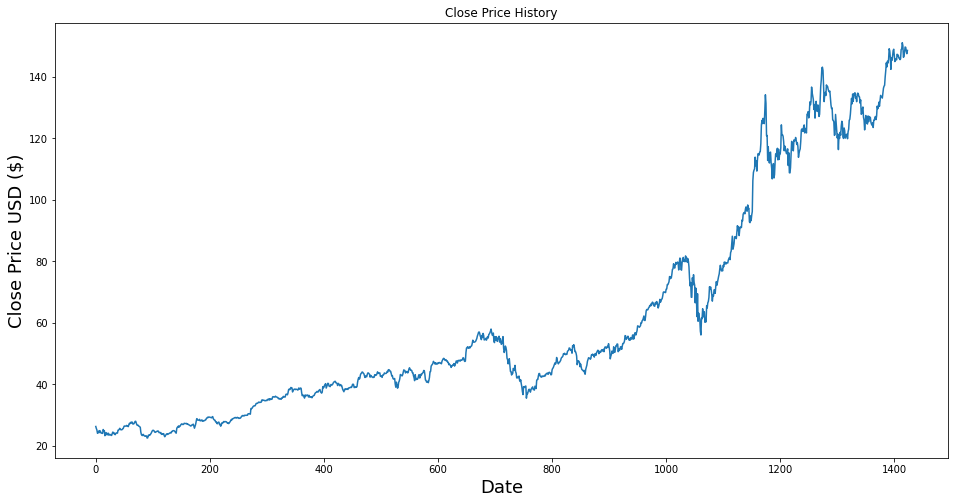

In [8]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(apple_df.reset_index()['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [9]:
#Getting the data we need and converting it to returns
apple_close= apple_df['Close']
apple_returns= np.log(apple_close)
apple_returns.head()

Date
2016-01-04    3.270994
2016-01-05    3.245615
2016-01-06    3.225851
2016-01-07    3.182730
2016-01-08    3.188004
Name: Close, dtype: float64

In [10]:
# To perform ADF Test For Apple Returns Before Differencing
from statsmodels.tsa.stattools import adfuller

X = apple_returns.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -0.061544
p-value: 0.953137
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


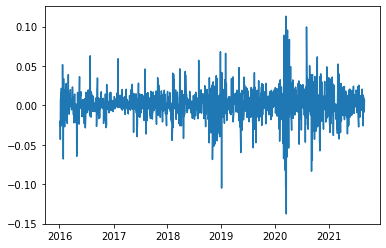

In [11]:
apple_diff = apple_returns.diff()
plt.plot(apple_diff)
plt.show()

In [12]:
#ADF Test for Apple returns after first order differencing
Y= apple_diff.dropna().values
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -11.414375
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Reject Ho - Time Series is Stationary


In [13]:
apple_diff

Date
2016-01-04         NaN
2016-01-05   -0.025379
2016-01-06   -0.019764
2016-01-07   -0.043121
2016-01-08    0.005274
                ...   
2021-08-23    0.010205
2021-08-24   -0.000601
2021-08-25   -0.008457
2021-08-26   -0.005542
2021-08-27    0.007159
Name: Close, Length: 1424, dtype: float64

In [14]:
apple_diff.dropna()

Date
2016-01-05   -0.025379
2016-01-06   -0.019764
2016-01-07   -0.043121
2016-01-08    0.005274
2016-01-11    0.016063
                ...   
2021-08-23    0.010205
2021-08-24   -0.000601
2021-08-25   -0.008457
2021-08-26   -0.005542
2021-08-27    0.007159
Name: Close, Length: 1423, dtype: float64

In [15]:
apple_returns.describe()

count    1424.000000
mean        3.963079
std         0.535320
min         3.117286
25%         3.601192
50%         3.850945
75%         4.347338
max         5.018074
Name: Close, dtype: float64

In [16]:
from scipy import stats

stats.describe(apple_returns)

DescribeResult(nobs=1424, minmax=(3.117285928569602, 5.018074190882424), mean=3.9630792275388877, variance=0.28656769186043674, skewness=0.4535114110064252, kurtosis=-0.8559083665768146)

In [17]:
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.stattools import jarque_bera

In [18]:
name = ['Jarque-Bera test', 'Chi-squared(2) p-value', 'Skewness', 'Kurtosis']
test = sms.jarque_bera(apple_close)
lzip(name, test)

[('Jarque-Bera test', 280.7222877590558),
 ('Chi-squared(2) p-value', 1.101361116048686e-61),
 ('Skewness', 1.084549983006714),
 ('Kurtosis', 2.8378893888925796)]

In [19]:
name = ['Jarque-Bera test', 'Chi-squared(2) p-value', 'Skewness', 'Kurtosis']
test = sms.jarque_bera(apple_diff.dropna())
lzip(name, test)

[('Jarque-Bera test', 2982.1157484041737),
 ('Chi-squared(2) p-value', 0.0),
 ('Skewness', -0.33641341611838077),
 ('Kurtosis', 10.059957637862373)]

Text(0, 0.5, 'Normalized Count')

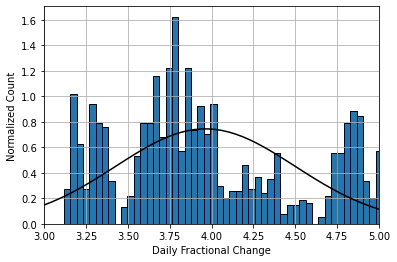

In [20]:
#  Generate a histogram and automatically scale by area under the curve
from scipy.stats import norm, kurtosis, skew

n, bins, patches = plt.hist(apple_returns, bins = 50, density = True, edgecolor = 'black')

mean = 3.963079
sd = 0.535320

#  Use the mean and standard deviation from above to generate a normal curve with those inputs
x = np.linspace(3.0, 5.0, 50)
y = norm.pdf(x, mean, sd)

#  Overlay the normal curve on the histogram
plt.plot(x, y, 'k')
plt.xlim( [3.0, 5.0]) 
plt.grid(True)
plt.xlabel('Daily Fractional Change')
plt.ylabel('Normalized Count')      

In [21]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

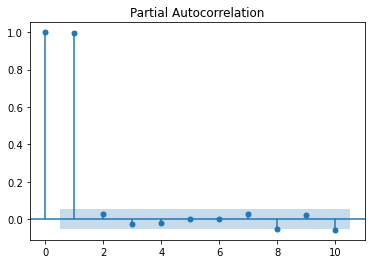

In [22]:
#PACF plot for apple returns
plot_pacf(X, lags=10);

In [23]:
model = ARIMA(apple_diff.dropna(), order=(3,1,0))

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [24]:
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1422
Model:                 ARIMA(3, 1, 0)   Log Likelihood                3478.412
Method:                       css-mle   S.D. of innovations              0.021
Date:                Fri, 17 Sep 2021   AIC                          -6946.823
Time:                        09:29:51   BIC                          -6920.524
Sample:                             1   HQIC                         -6937.000
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.64e-05      0.000      0.078      0.938      -0.000       0.000
ar.L1.D.Close    -0.8428      0.026    -32.957      0.000      -0.893      -0.793
ar.L2.D.Close    -0.5372      0.031    -

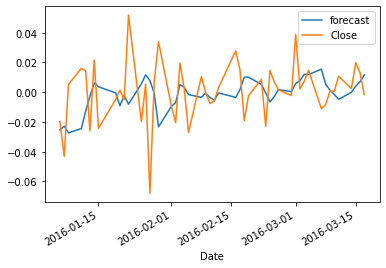

In [25]:
#First 50 Predictions for apple returns
model_fit.plot_predict(start=1, end=50, dynamic=False);

**MICROSOFT STOCK ANALYSIS**

In [26]:
microsoft_df = yf.download('MSFT', start='2016-01-01',end='2021-08-28')
microsoft_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,54.320000,54.799999,53.389999,54.799999,49.681782,53778000
2016-01-05,54.930000,55.389999,54.540001,55.049999,49.908432,34079700
2016-01-06,54.320000,54.400002,53.639999,54.049999,49.001839,39518900
2016-01-07,52.700001,53.490002,52.070000,52.169998,47.297417,56564900
2016-01-08,52.369999,53.279999,52.150002,52.330002,47.442482,48754000
...,...,...,...,...,...,...
2021-08-23,303.250000,305.399994,301.850006,304.649994,304.649994,22830200
2021-08-24,305.019989,305.649994,302.000000,302.619995,302.619995,18175800
2021-08-25,304.299988,304.589996,300.420013,302.010010,302.010010,20006100


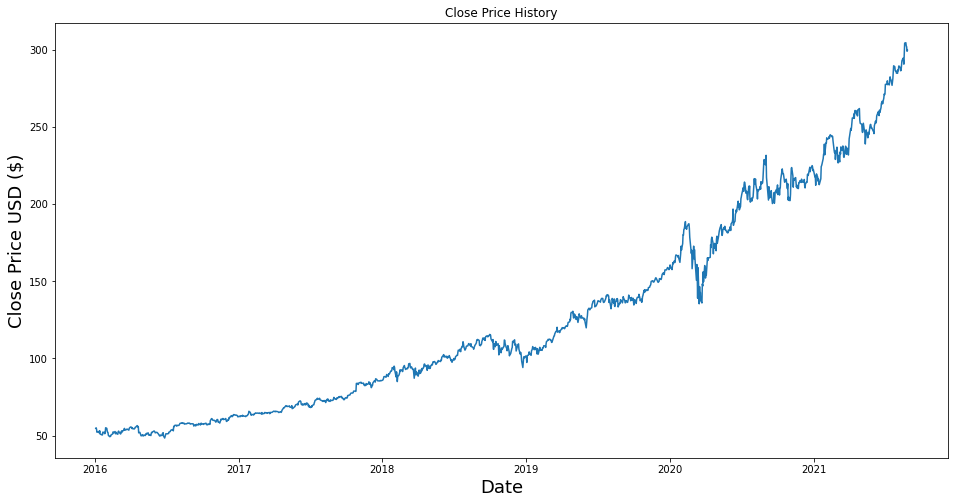

In [27]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(microsoft_df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [28]:
#Getting the data we need and converting it to returns
microsoft_close= microsoft_df['Close']
microsoft_returns= np.log(microsoft_close)
microsoft_returns.head()

Date
2016-01-04    4.003690
2016-01-05    4.008242
2016-01-06    3.989910
2016-01-07    3.954508
2016-01-08    3.957570
Name: Close, dtype: float64

In [29]:
#ADF Test for Microsoft Returns before differencing
T = microsoft_returns.values
result = adfuller(T)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: 0.368255
p-value: 0.980268
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


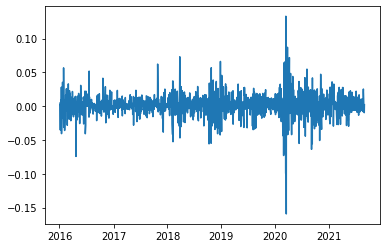

In [30]:
microsoft_diff = microsoft_returns.diff()
plt.plot(microsoft_diff)
plt.show()

In [31]:
#ADF Test for microsoft returns after first order differencing
W= microsoft_diff.dropna().values
result = adfuller(W)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -13.341902
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Reject Ho - Time Series is Stationary


In [32]:
microsoft_diff.dropna()

Date
2016-01-05    0.004552
2016-01-06   -0.018332
2016-01-07   -0.035402
2016-01-08    0.003062
2016-01-11   -0.000573
                ...   
2021-08-23    0.000952
2021-08-24   -0.006686
2021-08-25   -0.002018
2021-08-26   -0.009716
2021-08-27    0.002104
Name: Close, Length: 1423, dtype: float64

In [33]:
microsoft_returns.describe()

count    1424.000000
mean        4.711227
std         0.517553
min         3.880119
25%         4.240031
50%         4.678095
75%         5.157833
max         5.719164
Name: Close, dtype: float64

In [34]:
stats.describe(microsoft_returns)

DescribeResult(nobs=1424, minmax=(3.8801194627165168, 5.7191635566599865), mean=4.7112266983764854, variance=0.267861602183088, skewness=0.15155254920265035, kurtosis=-1.1690978523658169)

In [35]:
name = ['Jarque-Bera test', 'Chi-squared(2) p-value', 'Skewness', 'Kurtosis']
test_2 = sms.jarque_bera(microsoft_close)
lzip(name, test_2)

[('Jarque-Bera test', 158.9432218275418),
 ('Chi-squared(2) p-value', 3.0613847338931176e-35),
 ('Skewness', 0.7769669195800216),
 ('Kurtosis', 2.486085640479528)]

In [36]:
name = ['Jarque-Bera test', 'Chi-squared(2) p-value', 'Skewness', 'Kurtosis']
test_2 = sms.jarque_bera(microsoft_returns)
lzip(name, test_2)

[('Jarque-Bera test', 86.5473076857487),
 ('Chi-squared(2) p-value', 1.6087587581944862e-19),
 ('Skewness', 0.15155254920265035),
 ('Kurtosis', 1.8309021476341831)]

Text(0, 0.5, 'Normalized Count')

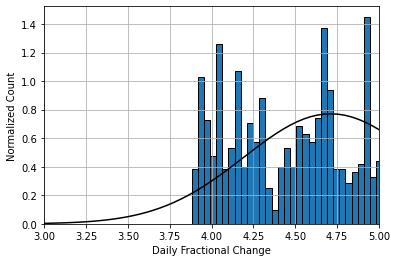

In [37]:
n, bins, patches = plt.hist(microsoft_returns, bins = 50, density = True, edgecolor = 'black')

mean_2 = 4.711227
sd_2 = 0.517553

#  Use the mean and standard deviation from above to generate a normal curve with those inputs
x = np.linspace(3.0, 5.0, 50)
y = norm.pdf(x, mean_2, sd_2)

#  Overlay the noraml curve on the nistogram
plt.plot(x, y, 'k')
plt.xlim( [3.0, 5.0]) 
plt.grid(True)
plt.xlabel('Daily Fractional Change')
plt.ylabel('Normalized Count')

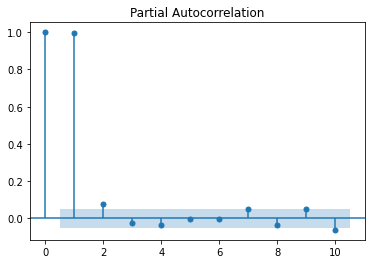

In [38]:
#PACF for Microsoft Returns
plot_pacf(T, lags=10);

In [39]:
model_2 = ARIMA(microsoft_diff.dropna(), order=(2,1,0))

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [40]:
model_2_fit = model_2.fit()
print(model_2_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1422
Model:                 ARIMA(2, 1, 0)   Log Likelihood                3599.263
Method:                       css-mle   S.D. of innovations              0.019
Date:                Fri, 17 Sep 2021   AIC                          -7190.526
Time:                        09:29:53   BIC                          -7169.487
Sample:                             1   HQIC                         -7182.667
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.848e-06      0.000      0.026      0.979      -0.000       0.000
ar.L1.D.Close    -0.8795      0.024    -36.507      0.000      -0.927      -0.832
ar.L2.D.Close    -0.4186      0.024    -

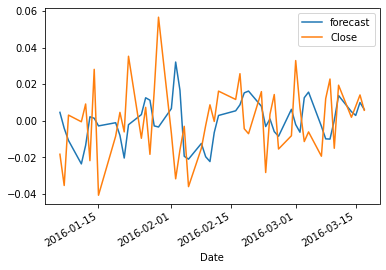

In [41]:
#First 50 Predictions for microsoft returns
model_2_fit.plot_predict(start=1, end=50, dynamic=False);

****COMPARISON****

In [42]:
df = pd.concat([apple_diff.dropna(), microsoft_diff.dropna()],axis=1)
df.columns = ['APPL','MSFT']
df.head()

,APPL,MSFT
Date,,
2016-01-05,-0.025379,0.004552
2016-01-06,-0.019764,-0.018332
2016-01-07,-0.043121,-0.035402
2016-01-08,0.005274,0.003062
2016-01-11,0.016063,-0.000573


In [43]:
df.corr()

,APPL,MSFT
APPL,1.000000,0.714441
MSFT,0.714441,1.000000


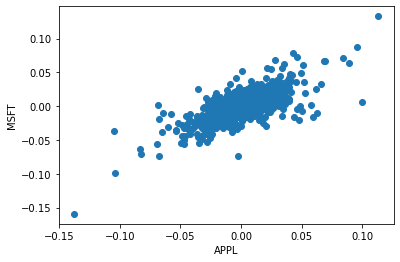

In [44]:
plt.scatter(df.APPL,df.MSFT)
plt.xlabel('APPL')
plt.ylabel('MSFT')
plt.show()